In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from datetime import datetime 
import numpy as np
import matplotlib.dates as mdates

In [ ]:
# Carregar os 3 arquivos CSV gerados pelo script de simulação

fato_vendas =pd.read_csv('data/fato_vendas.csv')
dim_produto= pd.read_csv('data/dim_produto.csv')
dim_tempo = pd.read_csv('data/dim_tempo.csv')

# Unir as tabelas para criar nosso DataFrame de análise
df_raw =pd.merge(fato_vendas,dim_produto, on='ID_Produto',how='left')
df_raw = pd.merge(df_raw, dim_tempo, on='ID_Data',how='left')

print("Dados brutos carregados e unidos")

Dados brutos carregados e unidos


In [25]:
# Visualizar as 5 primeiras linhas
df_raw.head()

,ID_Venda,ID_Produto,ID_Data,Quantidade,Preco_Unitario,Nome_Produto,Categoria,Data_Completa,Ano,Mes,Dia,Nome_Mes,Trimestre
0,1,15,180,2,693.82,Hic Esse,Casa e Cozinha,2023-06-29,2023,6,29,Junho,T2
1,2,11,24,17,210.99,Rerum Error,Esportes,2023-01-24,2023,1,24,Janeiro,T1
2,3,4,217,20,64.36,Ipsum Nihil,Esportes,2023-08-05,2023,8,5,Agosto,T3
3,4,12,83,3,556.67,Veritatis Optio,Esportes,2023-03-24,2023,3,24,Março,T1
4,5,1,161,21,62.32,Repellendus Tempore,Casa e Cozinha,2023-06-10,2023,6,10,Junho,T2


In [26]:
# Obter informações sobre as colunas, contagem de não-nulos e tipos de dados
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Venda        300 non-null    int64  
 1   ID_Produto      300 non-null    int64  
 2   ID_Data         300 non-null    int64  
 3   Quantidade      300 non-null    int64  
 4   Preco_Unitario  300 non-null    float64
 5   Nome_Produto    300 non-null    object 
 6   Categoria       300 non-null    object 
 7   Data_Completa   300 non-null    object 
 8   Ano             300 non-null    int64  
 9   Mes             300 non-null    int64  
 10  Dia             300 non-null    int64  
 11  Nome_Mes        300 non-null    object 
 12  Trimestre       300 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 30.6+ KB


In [ ]:
#  verificar se existem linhas completamente idênticas no dataset original
duplicatas_brutas =df_raw.duplicated().sum()
print(f"numero de linhas duplicadas nos dados brutos:{duplicatas_brutas}")

Número de linhas duplicadas nos dados brutos: 0


In [28]:
# o comando .describe() dá um resumo estatístico (média, mediana, desvio padrão)
# para todas as colunas numéricas.
df_raw.describe()

,ID_Venda,ID_Produto,ID_Data,Quantidade,Preco_Unitario,Ano,Mes,Dia
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000
mean,150.500000,8.00000,179.696667,7.566667,429.319233,2023.0,6.413333,15.823333
std,86.746758,4.31533,104.246386,5.400256,247.201055,0.0,3.409973,8.582403
min,1.000000,1.00000,3.000000,1.000000,21.480000,2023.0,1.000000,1.000000
25%,75.750000,4.00000,86.000000,3.000000,224.340000,2023.0,3.000000,8.750000
50%,150.500000,8.00000,183.000000,6.000000,418.695000,2023.0,7.000000,17.000000
75%,225.250000,11.25000,269.000000,10.000000,638.080000,2023.0,9.000000,22.000000
max,300.000000,15.00000,364.000000,22.000000,892.510000,2023.0,12.000000,31.000000


In [ ]:
# Criando uma cópia para não alterar o dataframe original
df_com_problemas = df_raw.copy()
# Introduzindo 5 valores nulos (NaN) na coluna 'Preco_Unitario'
df_com_problemas.loc[df_com_problemas.sample(n=5).index,'Preco_Unitario'] =np.nan

# Introduzindo 2 linhas duplicadas
df_com_problemas =pd.concat([df_com_problemas,df_com_problemas.head(2)])

print("dataFrame com imperfeições criado para a demonstração da limpeza")

DataFrame com imperfeições criado para a demonstração da limpeza.


In [35]:
print("---investigando dataFrame com problemas ---")

# Verificando os valores nulos
print("\nContagem de valores nulos:")
print(df_com_problemas.isnull().sum())

# Verificando as linhas duplicadas 
print("\ncontagem de linhas duplicadas:")
print(f"numero de duplicatas encontradas: {df_com_problemas.duplicated().sum()}")

print(f"\ndormato do dataframe(linhas,colunas):{df_com_problemas.shape}")

---investigando dataFrame com problemas ---

Contagem de valores nulos:
ID_Venda          0
ID_Produto        0
ID_Data           0
Quantidade        0
Preco_Unitario    5
Nome_Produto      0
Categoria         0
Data_Completa     0
Ano               0
Mes               0
Dia               0
Nome_Mes          0
Trimestre         0
dtype: int64

contagem de linhas duplicadas:
numero de duplicatas encontradas: 2

dormato do dataframe(linhas,colunas):(302, 13)


---dados mensais ordenados para o gráfico ---
Data_Completa
2023-01-01    76949.69
2023-02-01    84027.90
2023-03-01    49040.85
2023-04-01    41354.31
2023-05-01    82982.59
2023-06-01    45054.98
2023-07-01    51266.42
2023-08-01    72875.38
2023-09-01    53075.54
2023-10-01    53964.67
2023-11-01    50798.49
2023-12-01    37560.41
Freq: MS, Name: Receita, dtype: float64


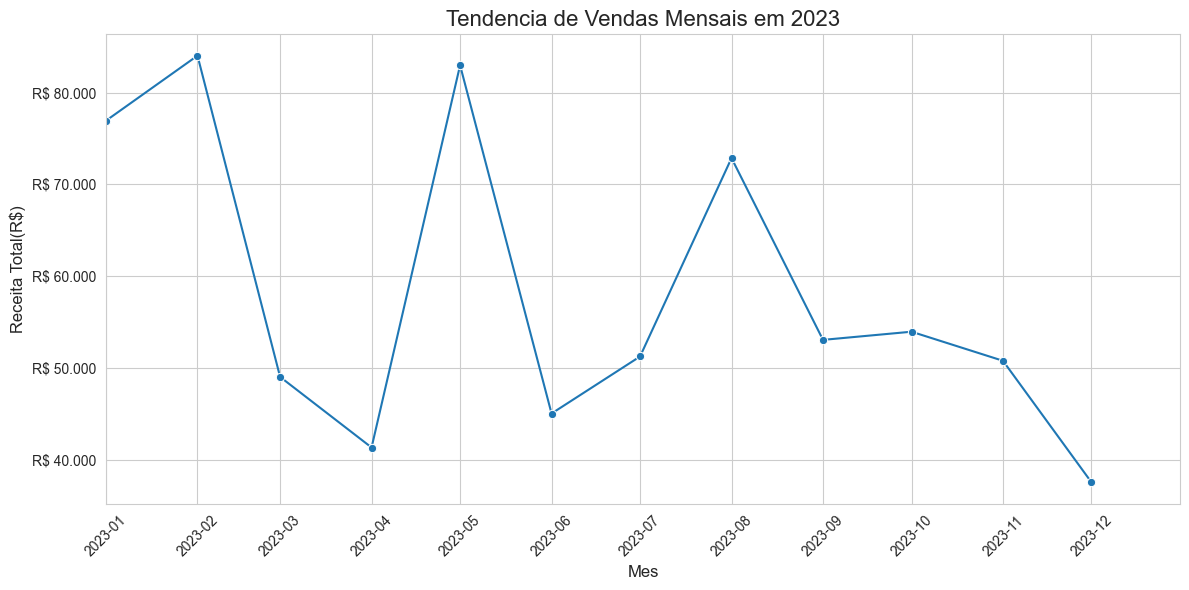

grafico gerado com sucesso


In [ ]:

# 1.CARREGAnDO OS DADOS
df_clean =pd.read_csv('data/data_clean.csv')

# 2. PREPARACAO DOS DADOS
df_clean['Data_Completa'] =pd.to_datetime(df_clean['Data_Completa'])
df_clean.set_index('Data_Completa',inplace=True)

vendas_mensais =df_clean['Receita'].resample('MS').sum().sort_index()

print("---dados mensais ordenados para o gráfico ---")
print(vendas_mensais)

# 3.CRIACAO DO GRÁFICO
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=vendas_mensais.index,y=vendas_mensais.values,marker='o',linestyle='-')

# adicionando titulos e rotulos
plt.title('Tendencia de Vendas Mensais em 2023',fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Receita Total(R$)',fontsize=12)

# Funcao para formatar o eixo Y como moeda
def format_currency(x,pos):
    return f'R$ {x:,.0f}'.replace(',', '.')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))

# Definindo os limites do eixo X para o ano de 2023
start_date =datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
plt.xlim(start_date, end_date)

# Ajustando os marcadores (ticks) do eixo X
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("grafico gerado com sucesso")

---analise da Relação entre Preço e Quantidade ---

coeficiente de correlacao de pearson:-0.6905
p-valor: 0.0000
bonclusao:a correlacao e estatisticamente significativa (p<0.05)

Gerando o gráfico de dispersão com a linha de regressão...


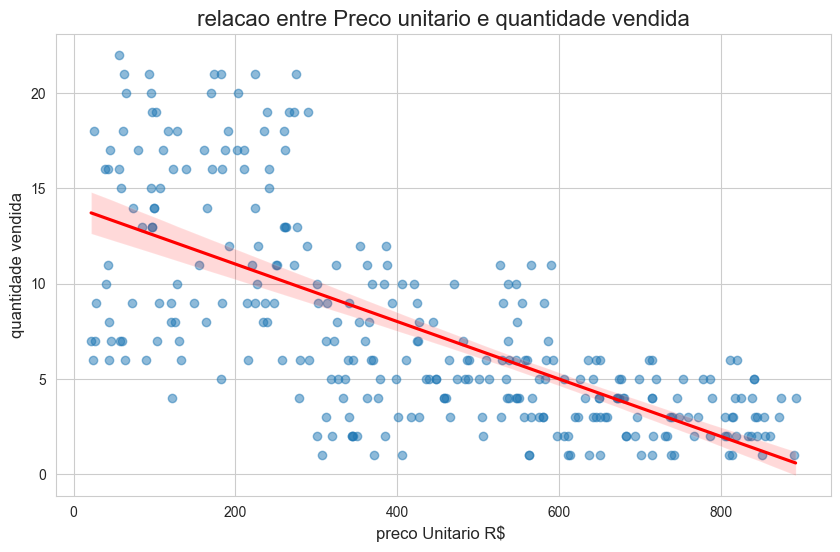

In [ ]:
from scipy.stats import pearsonr
import statsmodels.api as sm


print("---analise da Relação entre Preço e Quantidade ---\n")

# 1. teste de correlação de pearson
# este teste mede a força e a direção da relação linear entre duas variáveis.
# o resultado varia de -1 (correlação negativa perfeita) a +1 (positiva perfeita).
corr, p_valor = pearsonr(df_clean['Preco_Unitario'], df_clean['Quantidade'])

print(f"coeficiente de correlacao de pearson:{corr:.4f}")
print(f"p-valor: {p_valor:.4f}")
if p_valor<0.05:
    print("bonclusao:a correlacao e estatisticamente significativa (p<0.05)")
else:
    print("Conclusso: a correlacao nao e estatisticamente significativa(p>= 0.05)")


# 2.visualizacao com Gráfico de dispersao e Linha de Regressão
print("\nGerando o grafico de dispersao com a linha de regressao")

plt.figure(figsize=(10, 6))
# regplot do seaborn,que ja plota a dispersão e a linha de regressao automaticamente
sns.regplot(data=df_clean, x='Preco_Unitario', y='Quantidade',
            line_kws={"color": "red"},  #Deixa a linha de regressão vermelha para destacar
            scatter_kws={"alpha": 0.5}) # deixa os pontos um pouco transparentes

plt.title('relacao entre Preco unitario e quantidade vendida',fontsize=16)
plt.xlabel('preco Unitario R$ ', fontsize=12)
plt.ylabel('quantidade vendida',fontsize=12)
plt.grid(True)
plt.show()